In [56]:
# In[1]: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plotting defaults
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


In [57]:
# Example file paths (adjust as needed)
path_nh_citations = 'data/final-csv/nh_citations.csv'
path_nh_ownership = 'data/final-csv/nh_ownership.csv'
path_nh_quality_mds = 'data/final-csv/nh_quality_mds.csv'
path_nh_survey = 'data/final-csv/nh_survey.csv'
path_pbj_non_nurse = 'data/final-csv/pbj_non_nurse.csv'
path_pbj_nurse = 'data/final-csv/pbj_nurse.csv'
path_qrp_provider = 'data/final-csv/qrp_provider.csv'

# Read CSVs into DataFrames with low_memory=False
df_nh_citations = pd.read_csv(path_nh_citations, low_memory=False)
df_nh_ownership = pd.read_csv(path_nh_ownership, low_memory=False)
df_nh_quality_mds = pd.read_csv(path_nh_quality_mds, low_memory=False)
df_nh_survey = pd.read_csv(path_nh_survey, low_memory=False)
df_pbj_non_nurse = pd.read_csv(path_pbj_non_nurse, low_memory=False)
df_pbj_nurse = pd.read_csv(path_pbj_nurse, low_memory=False)
df_qrp_provider = pd.read_csv(path_qrp_provider, low_memory=False)

# Quick checks
print("nh_citations shape:", df_nh_citations.shape)
print("nh_ownership shape:", df_nh_ownership.shape)
print("nh_quality_mds shape:", df_nh_quality_mds.shape)
print("nh_survey shape:", df_nh_survey.shape)
print("pbj_non_nurse shape:", df_pbj_non_nurse.shape)
print("pbj_nurse shape:", df_pbj_nurse.shape)
print("qrp_provider shape:", df_qrp_provider.shape)


nh_citations shape: (406789, 23)
nh_ownership shape: (144651, 13)
nh_quality_mds shape: (251464, 23)
nh_survey shape: (44189, 41)
pbj_non_nurse shape: (1325324, 82)
pbj_nurse shape: (1325324, 33)
qrp_provider shape: (710016, 16)


In [58]:
# Example: checking columns, dtypes, a few rows
for name, df in [
    ("nh_citations", df_nh_citations),
    ("nh_ownership", df_nh_ownership),
    ("nh_quality_mds", df_nh_quality_mds),
    ("nh_survey", df_nh_survey),
    ("pbj_non_nurse", df_pbj_non_nurse),
    ("pbj_nurse", df_pbj_nurse),
    ("qrp_provider", df_qrp_provider)
]:
    print(f"\n--- {name} ---")
    print("Columns:", df.columns.tolist())
    print("Data Types:\n", df.dtypes)
    print("Sample Rows:\n", df.head(3))



--- nh_citations ---
Columns: ['cms_certification_number_(ccn)', 'provider_name', 'provider_address', 'city/town', 'state', 'zip_code', 'survey_date', 'survey_type', 'deficiency_prefix', 'deficiency_category', 'deficiency_tag_number', 'deficiency_description', 'scope_severity_code', 'deficiency_corrected', 'correction_date', 'inspection_cycle', 'standard_deficiency', 'complaint_deficiency', 'infection_control_inspection_deficiency', 'citation_under_idr', 'citation_under_iidr', 'location', 'processing_date']
Data Types:
 cms_certification_number_(ccn)             object
provider_name                              object
provider_address                           object
city/town                                  object
state                                      object
zip_code                                    int64
survey_date                                object
survey_type                                object
deficiency_prefix                          object
deficiency_category    


Facility Size Stats:
Number of facilities: 14564
Census range: 1.4 to 732.3

Facility Size Distribution:
size_category
Small         24.4
Medium        50.4
Large         22.8
Very Large     2.5
Name: proportion, dtype: float64

Census Statistics by Size Category:
              mean_census                median_census
                    count    mean    std          mean
size_category                                         
Small                3551   35.90   9.95         35.93
Medium               7337   75.55  15.25         75.60
Large                3315  131.37  23.98        131.46
Very Large            361  270.28  78.48        270.44


C:\Users\paulo\AppData\Local\Temp\ipykernel_44528\3318454550.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_stats = facility_size.groupby('size_category').agg({


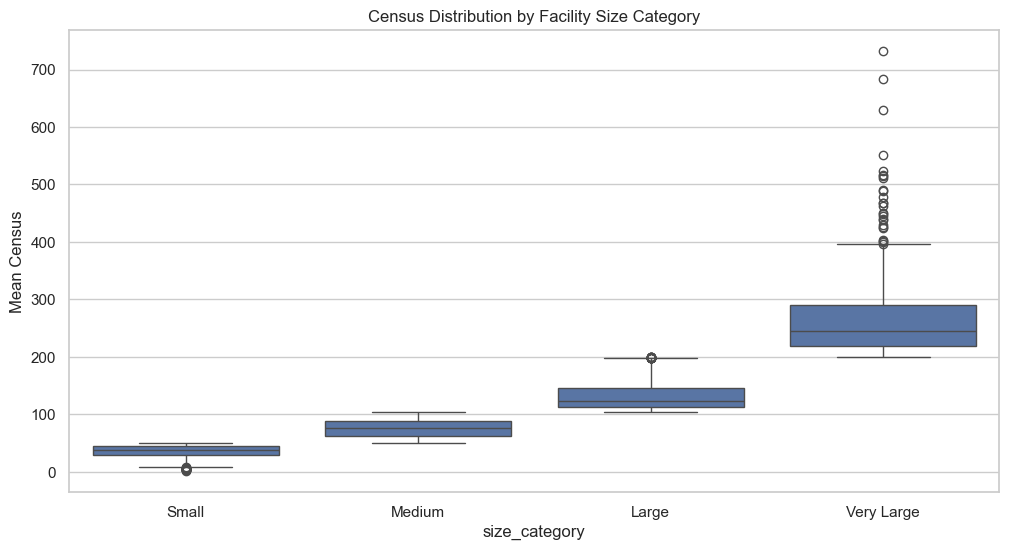

In [59]:
# 1. Calculate basic facility size metrics
facility_size = df_pbj_nurse.groupby('provnum').agg(
    mean_census=('mdscensus', 'mean'),
    median_census=('mdscensus', 'median'),
    std_census=('mdscensus', 'std')
).reset_index()

print("\nFacility Size Stats:")
print(f"Number of facilities: {len(facility_size)}")
print(f"Census range: {facility_size['mean_census'].min():.1f} to {facility_size['mean_census'].max():.1f}")

# Create size categories with Very Large category
size_bins = [0, 50, 104, 200, float('inf')]
size_labels = ['Small', 'Medium', 'Large', 'Very Large']

# Add size category
facility_size['size_category'] = pd.cut(facility_size['mean_census'], 
                                      bins=size_bins, 
                                      labels=size_labels)

# Basic distribution analysis
print("\nFacility Size Distribution:")
size_dist = facility_size['size_category'].value_counts(normalize=True).sort_index() * 100
print(size_dist.round(1))

# Summary statistics by size category
print("\nCensus Statistics by Size Category:")
size_stats = facility_size.groupby('size_category').agg({
    'mean_census': ['count', 'mean', 'std'],
    'median_census': 'mean'
}).round(2)
print(size_stats)

# Visualize the distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=facility_size, x='size_category', y='mean_census')
plt.title('Census Distribution by Facility Size Category')
plt.ylabel('Mean Census')
plt.show()

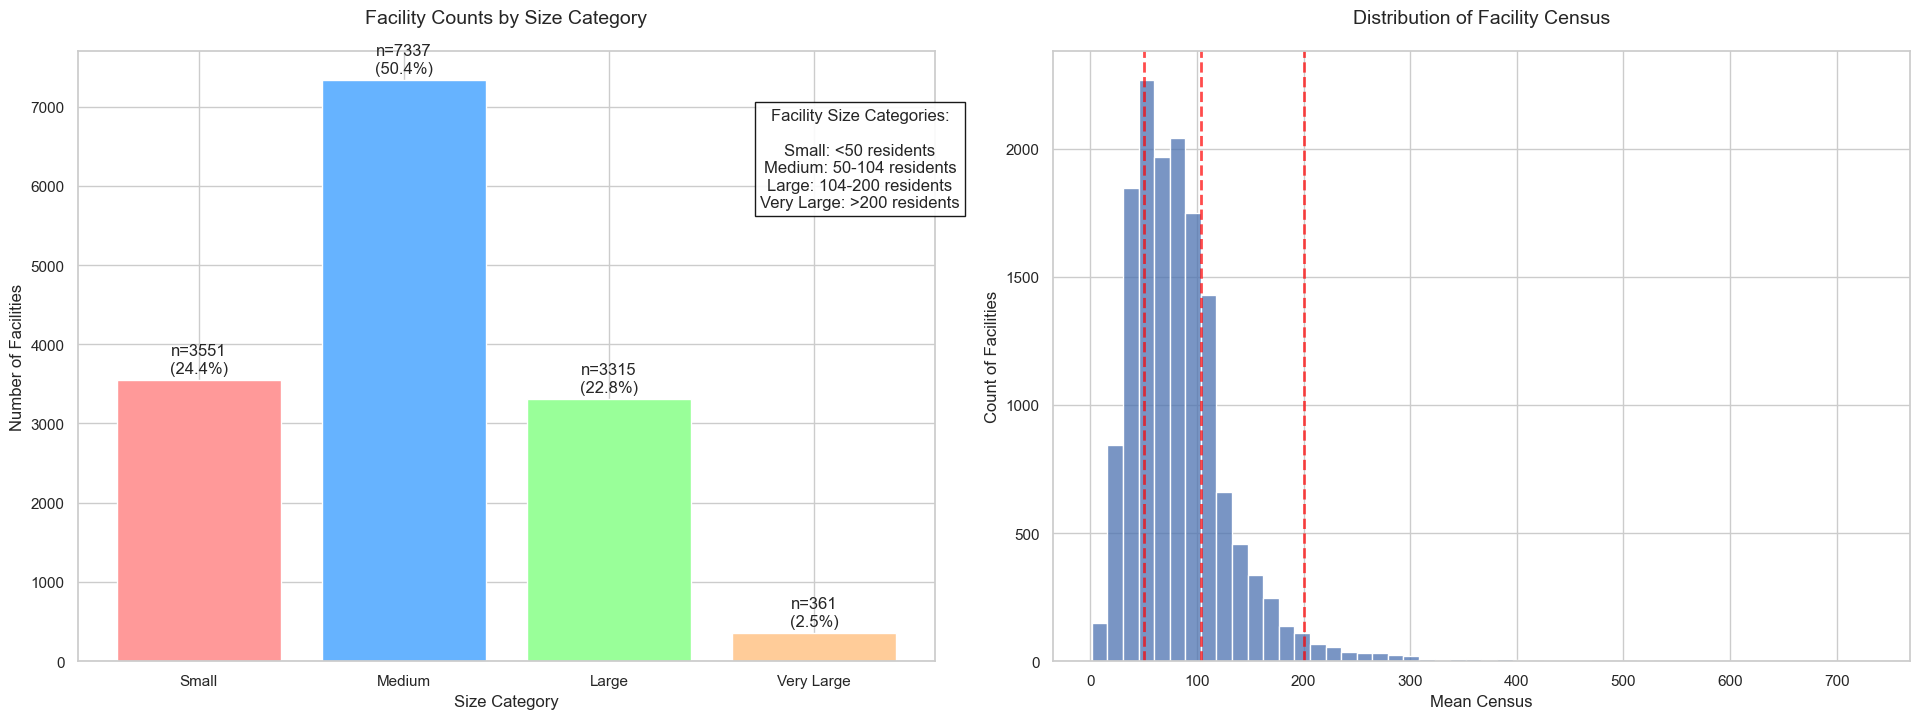

In [60]:
# Create visualization cell for facility size distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and figure size
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(20, 8))

# Create a gridspec layout with space for the legend in the middle
gs = plt.GridSpec(1, 4, figure=fig)
ax1 = fig.add_subplot(gs[0, 0:2])  # Bar chart on the left
ax2 = fig.add_subplot(gs[0, 2:])   # Histogram on the right

# 1. Bar plot with exact counts and percentages (now on the left)
size_dist = facility_size['size_category'].value_counts().sort_index()
counts = size_dist.values
percentages = (counts / counts.sum()) * 100
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

bars = ax1.bar(size_dist.index, counts, color=colors)
# Add count and percentage labels on top of each bar
for bar, count, percentage in zip(bars, counts, percentages):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 50,
             f'n={int(count)}\n({percentage:.1f}%)',
             ha='center', va='bottom', fontsize=12)

ax1.set_title('Facility Counts by Size Category', fontsize=14, pad=20)
ax1.set_ylabel('Number of Facilities', fontsize=12)
ax1.set_xlabel('Size Category', fontsize=12)

# 2. Histogram of mean census with category boundaries (now on the right)
sns.histplot(data=facility_size, x='mean_census', bins=50, ax=ax2)
boundaries = [50, 104, 200]

# Add vertical lines
for boundary in boundaries:
    ax2.axvline(x=boundary, color='red', linestyle='--', linewidth=2, alpha=0.7)

ax2.set_title('Distribution of Facility Census', fontsize=14, pad=20)
ax2.set_xlabel('Mean Census', fontsize=12)
ax2.set_ylabel('Count of Facilities', fontsize=12)

# Add legend in the middle of the figure, higher and slightly to the left
legend_text = ('Facility Size Categories:\n\n'
              'Small: <50 residents\n'
              'Medium: 50-104 residents\n'
              'Large: 104-200 residents\n'
              'Very Large: >200 residents')

fig.text(0.45, 0.75, legend_text, 
         ha='center', va='center',
         bbox=dict(facecolor='white', edgecolor='black', alpha=0.9),
         fontsize=12)

# Adjust layout
plt.tight_layout(pad=3.0)
plt.show()

In [61]:
# Ensure workdate is datetime
df_pbj_nurse['workdate'] = pd.to_datetime(df_pbj_nurse['workdate'])
df_pbj_non_nurse['workdate'] = pd.to_datetime(df_pbj_non_nurse['workdate'])

# Calculate facility sizes first
facility_size = df_pbj_nurse.groupby('provnum').agg(
    mean_census=('mdscensus', 'mean')
).reset_index()

# Add size categories
size_bins = [0, 50, 104, 200, float('inf')]
size_labels = ['Small', 'Medium', 'Large', 'Very Large']
facility_size['size_category'] = pd.cut(facility_size['mean_census'], 
                                      bins=size_bins, 
                                      labels=size_labels)

# Create mapping dictionary for quick lookup
size_mapping = facility_size.set_index('provnum')['size_category'].to_dict()

# First aggregate hours by facility and date
daily_ratios = df_pbj_nurse.groupby(['provnum', 'workdate']).agg({
    'hrs_rn_ctr': 'sum',
    'hrs_rn_emp': 'sum',
    'hrs_lpn_ctr': 'sum', 
    'hrs_lpn_emp': 'sum',
    'hrs_cna_ctr': 'sum',
    'hrs_cna_emp': 'sum'
}).reset_index()

# Calculate nursing ratios
daily_ratios['rn_daily_ratio'] = (daily_ratios['hrs_rn_ctr'] / 
                                (daily_ratios['hrs_rn_emp'] + daily_ratios['hrs_rn_ctr'] + 1e-6))

daily_ratios['lpn_daily_ratio'] = (daily_ratios['hrs_lpn_ctr'] / 
                                 (daily_ratios['hrs_lpn_emp'] + daily_ratios['hrs_lpn_ctr'] + 1e-6))

daily_ratios['cna_daily_ratio'] = (daily_ratios['hrs_cna_ctr'] / 
                                 (daily_ratios['hrs_cna_emp'] + daily_ratios['hrs_cna_ctr'] + 1e-6))

# Aggregate support staff hours by facility and date
support_hours = df_pbj_non_nurse.groupby(['provnum', 'workdate']).agg({
    col: 'sum' for col in df_pbj_non_nurse.columns if col.endswith(('_ctr', '_emp'))
}).reset_index()

# Calculate support ratio
contract_cols = [col for col in support_hours.columns if col.endswith('_ctr')]
employee_cols = [col for col in support_hours.columns if col.endswith('_emp')]

daily_ratios['support_daily_ratio'] = (
    support_hours[contract_cols].sum(axis=1) /
    (support_hours[contract_cols].sum(axis=1) + support_hours[employee_cols].sum(axis=1) + 1e-6)
)

# Add metadata columns
daily_ratios['day_of_week'] = daily_ratios['workdate'].dt.day_name()
daily_ratios['size_category'] = daily_ratios['provnum'].map(size_mapping)

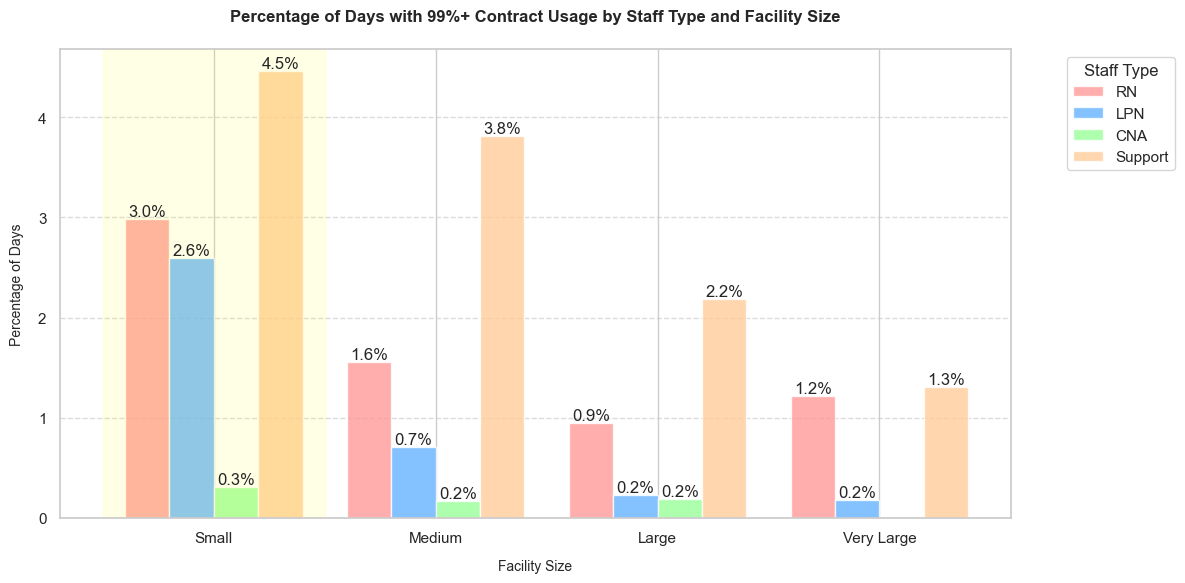


Detailed Breakdown:
Facility Size | High Contract Days | Total Days | Percentage
------------------------------------------------------------
Small        |            14420 |     323141 | 4.5%
Medium       |            25435 |     667667 | 3.8%
Large        |             6597 |     301665 | 2.2%
Very Large   |              429 |      32851 | 1.3%


In [62]:
# Set style for better visualization
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Calculate percentages for each staff type
staff_types = {
    'rn_daily_ratio': 'RN',
    'lpn_daily_ratio': 'LPN',
    'cna_daily_ratio': 'CNA',
    'support_daily_ratio': 'Support'
}

# Define the correct size order
size_order = ['Small', 'Medium', 'Large', 'Very Large']

data = []
for ratio_col, staff_name in staff_types.items():
    high_contract_days = daily_ratios[
        daily_ratios[ratio_col] >= 0.99
    ].groupby('size_category').size()
    
    total_days = daily_ratios.groupby('size_category').size()
    high_contract_percentage = (high_contract_days / total_days * 100).round(2)
    # Reorder the series according to size_order
    high_contract_percentage = high_contract_percentage.reindex(size_order)
    data.append(high_contract_percentage)

# Create DataFrame for plotting
df_plot = pd.DataFrame(data, index=staff_types.values())

# Create the visualization
plt.figure(figsize=(12, 6))

# Plot bars
bar_width = 0.2
positions = np.arange(len(df_plot.columns))

for idx, (staff_type, percentages) in enumerate(df_plot.iterrows()):
    offset = idx * bar_width
    bars = plt.bar(positions + offset, percentages, 
                   bar_width, 
                   label=staff_type,
                   color=colors[idx],
                   alpha=0.8)
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom')

# Customize the plot
plt.title('Percentage of Days with 99%+ Contract Usage by Staff Type and Facility Size',
          pad=20, fontsize=12, fontweight='bold')
plt.xlabel('Facility Size', fontsize=10, labelpad=10)
plt.ylabel('Percentage of Days', fontsize=10, labelpad=10)

# Set x-axis labels
plt.xticks(positions + bar_width * 1.5, size_order, rotation=0)

# Add legend
plt.legend(title='Staff Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight small facilities
plt.axvspan(-0.2, 0.8, alpha=0.1, color='yellow', label='Small Facilities')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Print the actual numbers
print("\nDetailed Breakdown:")
print("Facility Size | High Contract Days | Total Days | Percentage")
print("-" * 60)
for size in high_contract_percentage.index:
    print(f"{size:12} | {high_contract_days[size]:16} | {total_days[size]:10} | {high_contract_percentage[size]:.1f}%")

C:\Users\paulo\AppData\Local\Temp\ipykernel_44528\3059101108.py:167: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xy=(max_nursing_idx, max(rn_daily.reindex(day_order)[max_nursing_idx] * 100,
C:\Users\paulo\AppData\Local\Temp\ipykernel_44528\3059101108.py:168: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lpn_daily.reindex(day_order)[max_nursing_idx] * 100,
C:\Users\paulo\AppData\Local\Temp\ipykernel_44528\3059101108.py:169: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a va

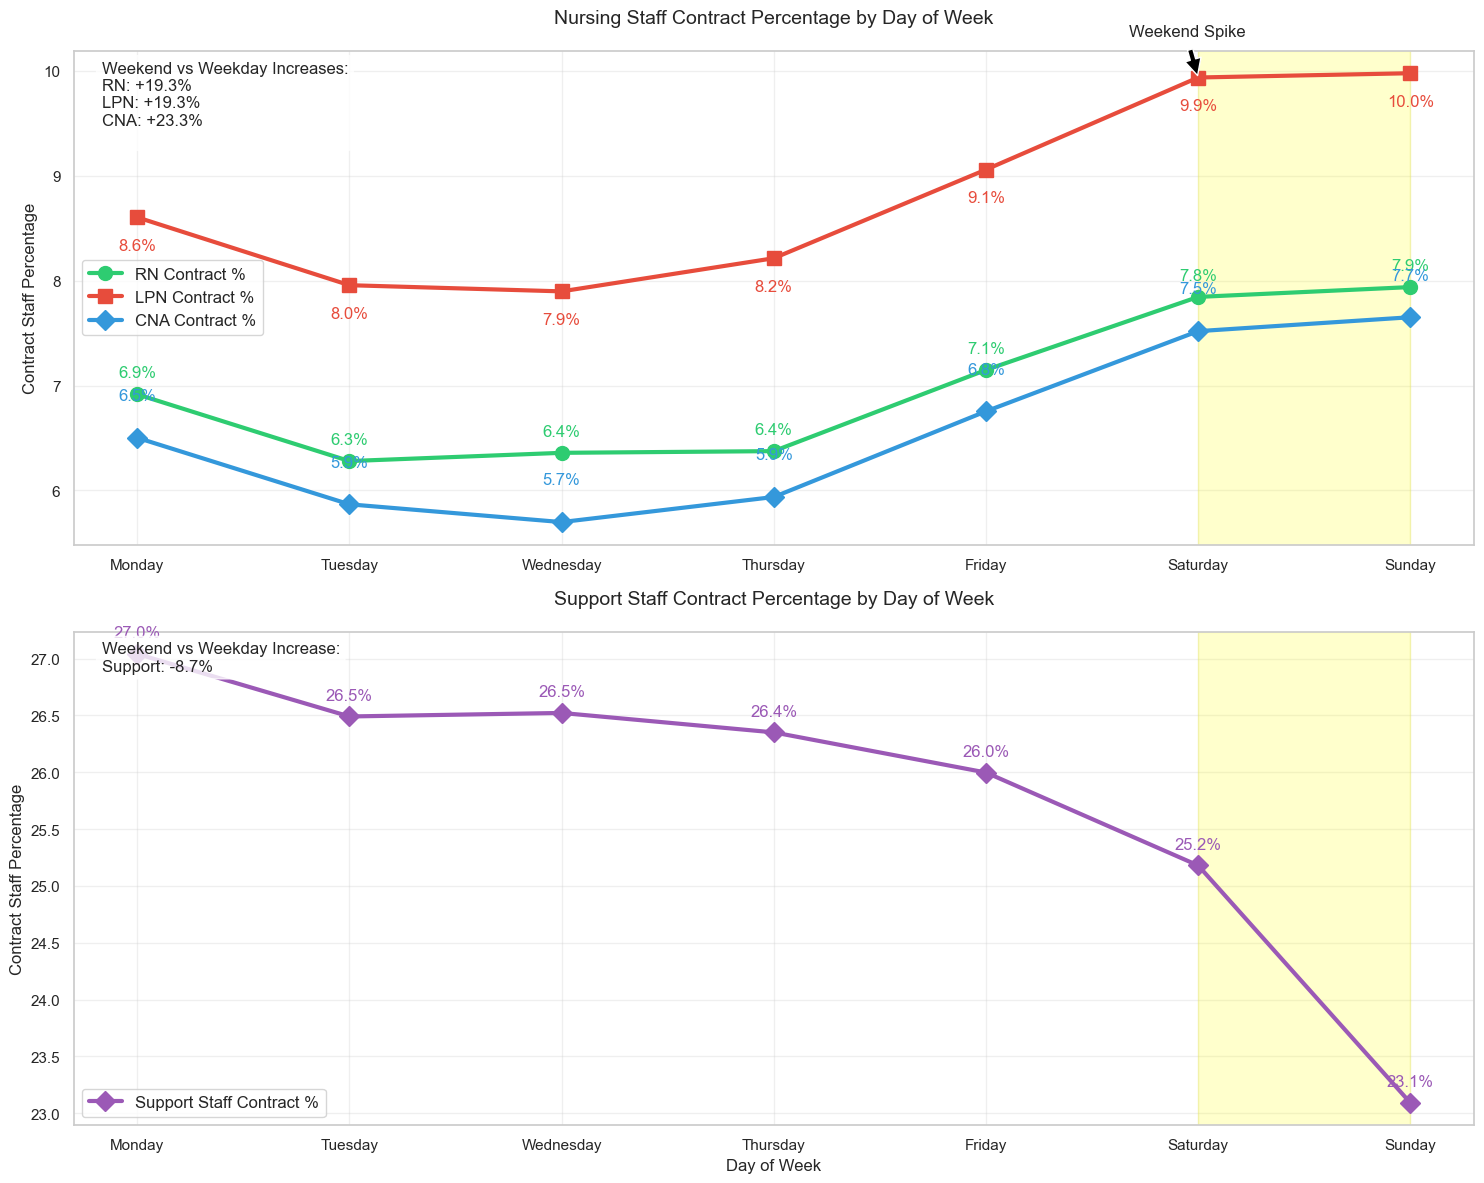


Detailed Weekend Analysis:

Nursing Staff:

RN:
  Weekday Average: 6.6%
  Weekend Average: 7.9%
  Increase: +19.3%

LPN:
  Weekday Average: 8.3%
  Weekend Average: 10.0%
  Increase: +19.3%

CNA:
  Weekday Average: 6.2%
  Weekend Average: 7.6%
  Increase: +23.3%

Support Staff:
  Weekday Average: 26.5%
  Weekend Average: 24.2%
  Increase: -8.7%


In [71]:
# Add day of week and weekend flag to both nurse and non-nurse data
df_pbj_nurse['date'] = pd.to_datetime(df_pbj_nurse['workdate'])
df_pbj_nurse['day_of_week'] = df_pbj_nurse['date'].dt.day_name()
df_pbj_nurse['is_weekend'] = df_pbj_nurse['date'].dt.dayofweek.isin([5, 6])  # 5=Saturday, 6=Sunday

df_pbj_non_nurse['date'] = pd.to_datetime(df_pbj_non_nurse['workdate'])
df_pbj_non_nurse['day_of_week'] = df_pbj_non_nurse['date'].dt.day_name()
df_pbj_non_nurse['is_weekend'] = df_pbj_non_nurse['date'].dt.dayofweek.isin([5, 6])  # 5=Saturday, 6=Sunday

# Calculate nursing staff ratios
df_pbj_nurse['total_rn_hours'] = df_pbj_nurse['hrs_rn_emp'] + df_pbj_nurse['hrs_rn_ctr']
df_pbj_nurse['rn_contract_ratio'] = df_pbj_nurse['hrs_rn_ctr'] / df_pbj_nurse['total_rn_hours']

df_pbj_nurse['total_lpn_hours'] = df_pbj_nurse['hrs_lpn_emp'] + df_pbj_nurse['hrs_lpn_ctr']
df_pbj_nurse['lpn_contract_ratio'] = df_pbj_nurse['hrs_lpn_ctr'] / df_pbj_nurse['total_lpn_hours']

df_pbj_nurse['total_cna_hours'] = df_pbj_nurse['hrs_cna_emp'] + df_pbj_nurse['hrs_cna_ctr']
df_pbj_nurse['cna_contract_ratio'] = df_pbj_nurse['hrs_cna_ctr'] / df_pbj_nurse['total_cna_hours']

# Calculate support staff ratio
# Get all contract and employee hour columns for support staff
support_ctr_cols = [col for col in df_pbj_non_nurse.columns if col.endswith('_ctr') and col not in ['hrs_rn_ctr', 'hrs_lpn_ctr', 'hrs_cna_ctr']]
support_emp_cols = [col for col in df_pbj_non_nurse.columns if col.endswith('_emp') and col not in ['hrs_rn_emp', 'hrs_lpn_emp', 'hrs_cna_emp']]

# Calculate total support hours and contract ratio
df_pbj_non_nurse['total_support_contract_hours'] = df_pbj_non_nurse[support_ctr_cols].sum(axis=1)
df_pbj_non_nurse['total_support_employee_hours'] = df_pbj_non_nurse[support_emp_cols].sum(axis=1)
df_pbj_non_nurse['total_support_hours'] = df_pbj_non_nurse['total_support_contract_hours'] + df_pbj_non_nurse['total_support_employee_hours']
df_pbj_non_nurse['support_contract_ratio'] = df_pbj_non_nurse['total_support_contract_hours'] / df_pbj_non_nurse['total_support_hours']
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Colors for nursing staff
colors = {
    'RN': '#2ecc71',    # Green
    'LPN': '#e74c3c',   # Red
    'CNA': '#3498db',   # Blue
}

# Day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

rn_daily = df_pbj_nurse.groupby('day_of_week')['rn_contract_ratio'].mean()
lpn_daily = df_pbj_nurse.groupby('day_of_week')['lpn_contract_ratio'].mean()
cna_daily = df_pbj_nurse.groupby('day_of_week')['cna_contract_ratio'].mean()
support_daily = df_pbj_non_nurse.groupby('day_of_week')['support_contract_ratio'].mean()

# 5. Create weekend/weekday masks
weekday_mask = ~df_pbj_nurse['is_weekend']
weekend_mask = df_pbj_nurse['is_weekend']
support_weekday_mask = ~df_pbj_non_nurse['is_weekend']
support_weekend_mask = df_pbj_non_nurse['is_weekend']

# Plot 1: Nursing Staff (RN, LPN, CNA)
ax1.plot(day_order, 
         rn_daily.reindex(day_order) * 100,
         marker='o', linewidth=3, markersize=10, 
         color=colors['RN'], 
         label='RN Contract %')

ax1.plot(day_order, 
         lpn_daily.reindex(day_order) * 100,
         marker='s', linewidth=3, markersize=10, 
         color=colors['LPN'], 
         label='LPN Contract %')

ax1.plot(day_order, 
         cna_daily.reindex(day_order) * 100,
         marker='D', linewidth=3, markersize=10, 
         color=colors['CNA'], 
         label='CNA Contract %')

# Highlight weekend in first plot
ax1.axvspan(5, 6, color='yellow', alpha=0.2)
ax1.set_title('Nursing Staff Contract Percentage by Day of Week', pad=20, fontsize=14)
ax1.set_ylabel('Contract Staff Percentage')
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=12)

# Add percentage annotations for RN
for i, val in enumerate(rn_daily.reindex(day_order) * 100):
    ax1.annotate(f'{val:.1f}%', 
                 xy=(i, val), 
                 xytext=(0, 10),
                 textcoords='offset points',
                 ha='center',
                 va='bottom',
                 color=colors['RN'])

# Add percentage annotations for LPN
for i, val in enumerate(lpn_daily.reindex(day_order) * 100):
    ax1.annotate(f'{val:.1f}%', 
                 xy=(i, val), 
                 xytext=(0, -15),
                 textcoords='offset points',
                 ha='center',
                 va='top',
                 color=colors['LPN'])

# Add percentage annotations for CNA
for i, val in enumerate(cna_daily.reindex(day_order) * 100):
    ax1.annotate(f'{val:.1f}%', 
                 xy=(i, val), 
                 xytext=(0, 25),
                 textcoords='offset points',
                 ha='center',
                 va='bottom',
                 color=colors['CNA'])

# Plot 2: Support Staff
ax2.plot(day_order,
         support_daily.reindex(day_order) * 100,
         marker='D', linewidth=3, markersize=10, 
         color='#9b59b6', 
         label='Support Staff Contract %')

# Highlight weekend in second plot
ax2.axvspan(5, 6, color='yellow', alpha=0.2)
ax2.set_title('Support Staff Contract Percentage by Day of Week', pad=20, fontsize=14)
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Contract Staff Percentage')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=12)

# Add percentage annotations for Support Staff
for i, val in enumerate(support_daily.reindex(day_order) * 100):
    ax2.annotate(f'{val:.1f}%', 
                 xy=(i, val), 
                 xytext=(0, 10),
                 textcoords='offset points',
                 ha='center',
                 va='bottom',
                 color='#9b59b6')

# Calculate weekend increases
increases = {
    'RN': ((df_pbj_nurse[weekend_mask]['rn_contract_ratio'].mean() / 
            df_pbj_nurse[weekday_mask]['rn_contract_ratio'].mean() - 1) * 100),
    'LPN': ((df_pbj_nurse[weekend_mask]['lpn_contract_ratio'].mean() / 
             df_pbj_nurse[weekday_mask]['lpn_contract_ratio'].mean() - 1) * 100),
    'CNA': ((df_pbj_nurse[weekend_mask]['cna_contract_ratio'].mean() / 
             df_pbj_nurse[weekday_mask]['cna_contract_ratio'].mean() - 1) * 100),
    'Support': ((df_pbj_non_nurse[support_weekend_mask]['support_contract_ratio'].mean() / 
                 df_pbj_non_nurse[support_weekday_mask]['support_contract_ratio'].mean() - 1) * 100)
}

# Add text box with weekend increases to each plot
nursing_text = "Weekend vs Weekday Increases:\n"
for role in ['RN', 'LPN', 'CNA']:
    nursing_text += f"{role}: {increases[role]:+.1f}%\n"
ax1.text(0.02, 0.98, nursing_text, 
         transform=ax1.transAxes,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

support_text = "Weekend vs Weekday Increase:\n"
support_text += f"Support: {increases['Support']:+.1f}%"
ax2.text(0.02, 0.98, support_text, 
         transform=ax2.transAxes,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Add arrows pointing to weekend spike
# For nursing staff
max_nursing_idx = 5  # Saturday
ax1.annotate('Weekend Spike', 
             xy=(max_nursing_idx, max(rn_daily.reindex(day_order)[max_nursing_idx] * 100,
                                    lpn_daily.reindex(day_order)[max_nursing_idx] * 100,
                                    cna_daily.reindex(day_order)[max_nursing_idx] * 100)),
             xytext=(-50, 30),
             textcoords='offset points',
             arrowprops=dict(facecolor='black', shrink=0.05),
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Weekend Analysis:")
print("\nNursing Staff:")
for role in ['RN', 'LPN', 'CNA']:
    weekday_avg = df_pbj_nurse[weekday_mask][f'{role.lower()}_contract_ratio'].mean() * 100
    weekend_avg = df_pbj_nurse[weekend_mask][f'{role.lower()}_contract_ratio'].mean() * 100
    print(f"\n{role}:")
    print(f"  Weekday Average: {weekday_avg:.1f}%")
    print(f"  Weekend Average: {weekend_avg:.1f}%")
    print(f"  Increase: {increases[role]:+.1f}%")

print("\nSupport Staff:")
weekday_avg = df_pbj_non_nurse[support_weekday_mask]['support_contract_ratio'].mean() * 100
weekend_avg = df_pbj_non_nurse[support_weekend_mask]['support_contract_ratio'].mean() * 100
print(f"  Weekday Average: {weekday_avg:.1f}%")
print(f"  Weekend Average: {weekend_avg:.1f}%")
print(f"  Increase: {increases['Support']:+.1f}%")


Exclusive RN Contract Staffing Summary:
----------------------------------------
Weekend average: 2.48%
Weekday average: 1.46%

Percentages by day:
Monday: 1.49%
Tuesday: 1.42%
Wednesday: 1.40%
Thursday: 1.44%
Friday: 1.57%
Saturday: 2.40%
Sunday: 2.56%


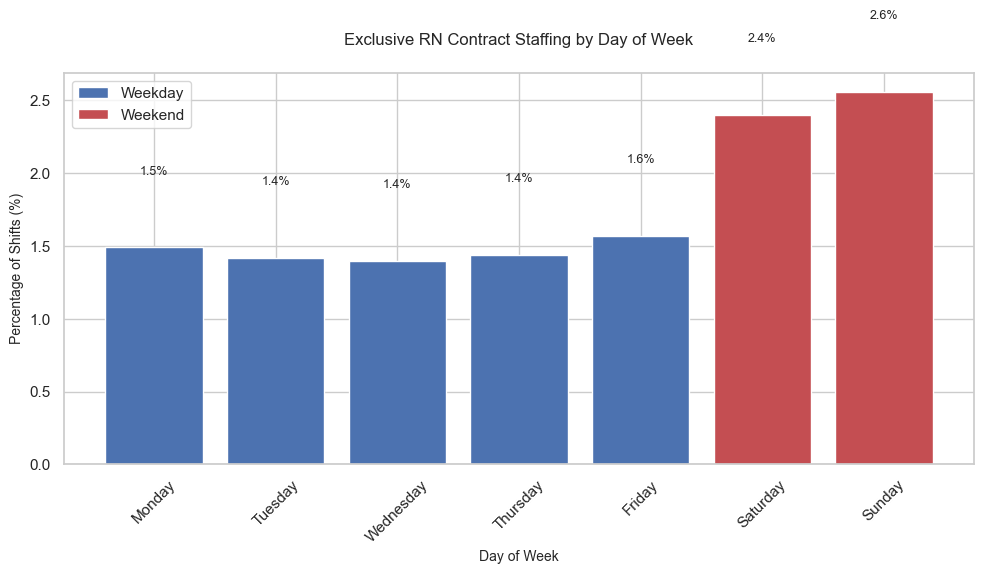

In [38]:
# 2. Identify exclusive contract days
exclusive_contract = df_pbj_nurse[
    (df_pbj_nurse['rn_contract_ratio'] == 1.0) & 
    (df_pbj_nurse['total_rn_hours'] > 0)
]

# 3. Calculate percentages by day
total_shifts_by_day = df_pbj_nurse.groupby('day_of_week').size()
exclusive_by_day = exclusive_contract.groupby('day_of_week').size()
percentage_by_day = (exclusive_by_day / total_shifts_by_day * 100).round(2)

# Sort days of week correctly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
percentage_by_day = percentage_by_day.reindex(day_order)

# 4. Create visualization
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# Create bars with seaborn color palette
bars = plt.bar(percentage_by_day.index, percentage_by_day.values, 
               color=[sns.color_palette()[0] if day not in ['Saturday', 'Sunday'] 
                     else sns.color_palette()[3] for day in percentage_by_day.index])

# Customize the plot
plt.title('Exclusive RN Contract Staffing by Day of Week', pad=20, fontsize=12)
plt.ylabel('Percentage of Shifts (%)', fontsize=10)
plt.xlabel('Day of Week', fontsize=10)

# Add value labels
for i, v in enumerate(percentage_by_day.values):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=9)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add legend using seaborn colors
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=sns.color_palette()[0], label='Weekday'),
    Patch(facecolor=sns.color_palette()[3], label='Weekend')
]
plt.legend(handles=legend_elements)

# Adjust layout
plt.tight_layout()

# 5. Print summary statistics
print("\nExclusive RN Contract Staffing Summary:")
print("----------------------------------------")
print(f"Weekend average: {percentage_by_day[['Saturday', 'Sunday']].mean():.2f}%")
print(f"Weekday average: {percentage_by_day[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']].mean():.2f}%")
print("\nPercentages by day:")
for day in day_order:
    print(f"{day}: {percentage_by_day[day]:.2f}%")


Exclusive RN Contract Staffing by Facility Size:
----------------------------------------

Percentages by size:
Small: 2.98%
Medium: 1.55%
Large: 0.94%
Very Large: 1.21%


C:\Users\paulo\AppData\Local\Temp\ipykernel_44528\2369997174.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_shifts_by_size = df_pbj_nurse_with_size.groupby('size_category').size()
C:\Users\paulo\AppData\Local\Temp\ipykernel_44528\2369997174.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exclusive_by_size = exclusive_contract.groupby('size_category').size()


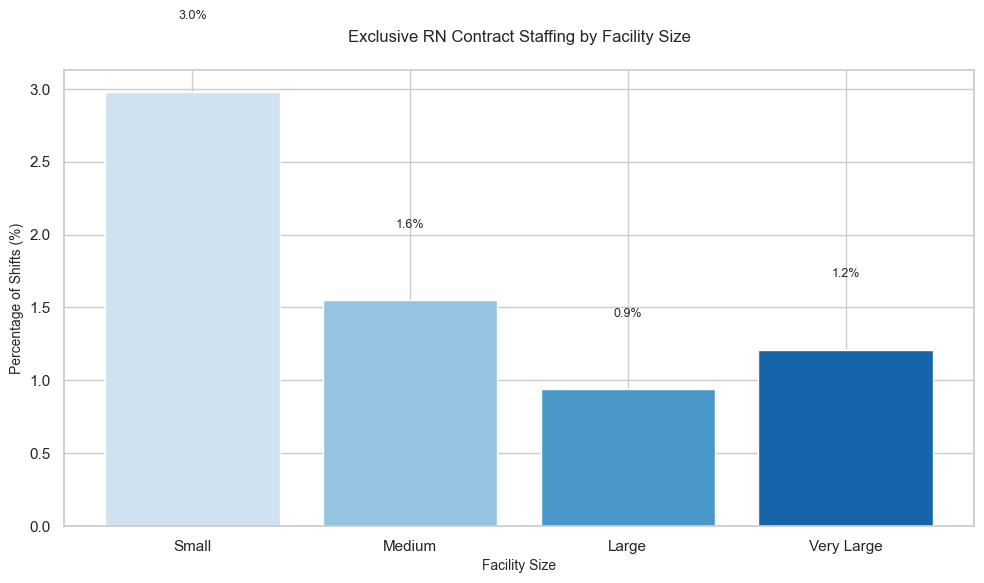

In [76]:
# 1. Calculate average census for each facility
facility_census = df_pbj_nurse.groupby('provnum')['mdscensus'].mean()

# 2. Create size categories using the same bins as before
size_bins = [0, 50, 104, 200, float('inf')]
size_labels = ['Small', 'Medium', 'Large', 'Very Large']

facility_sizes = pd.DataFrame(facility_census)
facility_sizes['size_category'] = pd.cut(facility_sizes['mdscensus'], 
                                       bins=size_bins, 
                                       labels=size_labels)

# 3. Merge size categories with nurse data
df_pbj_nurse_with_size = df_pbj_nurse.merge(
    facility_sizes[['size_category']], 
    left_on='provnum', 
    right_index=True
)

# 4. Calculate total RN hours and contract ratio
df_pbj_nurse_with_size['total_rn_hours'] = df_pbj_nurse_with_size['hrs_rn_emp'] + df_pbj_nurse_with_size['hrs_rn_ctr']
df_pbj_nurse_with_size['rn_contract_ratio'] = df_pbj_nurse_with_size['hrs_rn_ctr'] / df_pbj_nurse_with_size['total_rn_hours']

# 5. Identify exclusive contract days
exclusive_contract = df_pbj_nurse_with_size[
    (df_pbj_nurse_with_size['rn_contract_ratio'] == 1.0) & 
    (df_pbj_nurse_with_size['total_rn_hours'] > 0)
]

# 6. Calculate percentages by size
total_shifts_by_size = df_pbj_nurse_with_size.groupby('size_category').size()
exclusive_by_size = exclusive_contract.groupby('size_category').size()
percentage_by_size = (exclusive_by_size / total_shifts_by_size * 100).round(2)

# Sort size categories correctly
size_order = ['Small', 'Medium', 'Large', 'Very Large']
percentage_by_size = percentage_by_size.reindex(size_order)

# 7. Create visualization
plt.figure(figsize=(10, 6))

# Create bars with a color gradient
colors = sns.color_palette("Blues", n_colors=len(size_order))
bars = plt.bar(percentage_by_size.index, percentage_by_size.values, color=colors)

# Customize the plot
plt.title('Exclusive RN Contract Staffing by Facility Size', pad=20, fontsize=12)
plt.ylabel('Percentage of Shifts (%)', fontsize=10)
plt.xlabel('Facility Size', fontsize=10)

# Add value labels
for i, v in enumerate(percentage_by_size.values):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=9)

# Adjust layout
plt.tight_layout()

# 8. Print summary statistics
print("\nExclusive RN Contract Staffing by Facility Size:")
print("----------------------------------------")
print("\nPercentages by size:")
for size in size_order:
    print(f"{size}: {percentage_by_size[size]:.2f}%")

In [75]:
# 9. Print contract hours for exclusive RN contract days by facility size
print("\nContract Hours on Exclusive RN Contract Days by Facility Size:")
print("----------------------------------------")
print("\nHours by size:")
for size in size_order:
    # Get data for days with exclusive RN contract staffing
    size_data = exclusive_contract[exclusive_contract['size_category'] == size]
    exclusive_days = exclusive_by_size.get(size, 0)
    
    if exclusive_days > 0:
        # Get the facility numbers and dates for exclusive contract days
        exclusive_facilities = size_data['provnum'].unique()
        exclusive_dates = size_data['workdate'].unique()
        
        # Get support staff data for the same facilities and dates
        support_data = df_pbj_non_nurse[
            (df_pbj_non_nurse['provnum'].isin(exclusive_facilities)) & 
            (df_pbj_non_nurse['workdate'].isin(exclusive_dates))
        ]
        
        # Calculate hours for each staff type
        # Nursing staff
        rn_hours = size_data['hrs_rn_ctr'].sum()
        lpn_hours = size_data['hrs_lpn_ctr'].sum()
        cna_hours = size_data['hrs_cna_ctr'].sum()
        
        # Support staff - sum all contract hours from support staff
        support_ctr_cols = [col for col in support_data.columns if col.endswith('_ctr') 
                           and col not in ['hrs_rn_ctr', 'hrs_lpn_ctr', 'hrs_cna_ctr']]
        support_hours = support_data[support_ctr_cols].sum().sum()
        
        total_hours = rn_hours + lpn_hours + cna_hours + support_hours
        
        print(f"\n{size}:")
        print(f"  Days with exclusive RN contract staffing: {exclusive_days:,}")
        print(f"  Contract hours on these days:")
        print(f"    RN hours: {rn_hours:,.1f}")
        print(f"    LPN hours: {lpn_hours:,.1f}")
        print(f"    CNA hours: {cna_hours:,.1f}")
        print(f"    Support staff hours: {support_hours:,.1f}")
        print(f"    Total hours: {total_hours:,.1f}")


Contract Hours on Exclusive RN Contract Days by Facility Size:
----------------------------------------

Hours by size:

Small:
  Days with exclusive RN contract staffing: 9,623
  Contract hours on these days:
    RN hours: 131,179.9
    LPN hours: 73,849.8
    CNA hours: 196,489.5
    Support staff hours: 558,085.2
    Total hours: 959,604.4

Medium:
  Days with exclusive RN contract staffing: 10,010
  Contract hours on these days:
    RN hours: 152,482.6
    LPN hours: 221,309.3
    CNA hours: 370,745.9
    Support staff hours: 1,362,474.1
    Total hours: 2,107,011.8

Large:
  Days with exclusive RN contract staffing: 3,213
  Contract hours on these days:
    RN hours: 89,767.8
    LPN hours: 132,601.7
    CNA hours: 283,381.1
    Support staff hours: 602,053.4
    Total hours: 1,107,803.9

Very Large:
  Days with exclusive RN contract staffing: 397
  Contract hours on these days:
    RN hours: 21,899.1
    LPN hours: 34,428.2
    CNA hours: 69,619.4
    Support staff hours: 90,308